<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Deep-Learning/Udacity%20Projects/project1/neural-network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My first neural network

In this project, you'll build your first neural network and use it to predict daily bike rental ridership. We've provided some of the code, but left the implementation of the neural network up to you (for the most part). At the very bottom of the notebook, you'll find some unit tests to check the correctness of your neural network. Be sure to run these before you submit your project.

After you've submitted this project, feel free to explore the data and the model more.



In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
!git clone https://github.com/noushadkhan01/Deep-Learning-Projects.git

Cloning into 'Deep-Learning-Projects'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 76 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (76/76), done.


In [8]:
%cd Deep-Learning-Projects/project1

/Deep-Learning-Projects/project1


## Load and prepare the data

A critical step in working with neural networks is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data. You'll learn more about this soon!

In [0]:
data_path = 'bike-sharing-dataset/hour.csv'

rides = pd.read_csv(data_path)

In [10]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
rides.shape

(17379, 17)

In [12]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
rides.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Checking out the data

This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the `cnt` column. You can see the first few rows of the data above.

Below is a plot showing the number of bike riders over the first 10 days in the data set. You can see the hourly rentals here. This data is pretty complicated! The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders. You'll be trying to capture all this with your model.

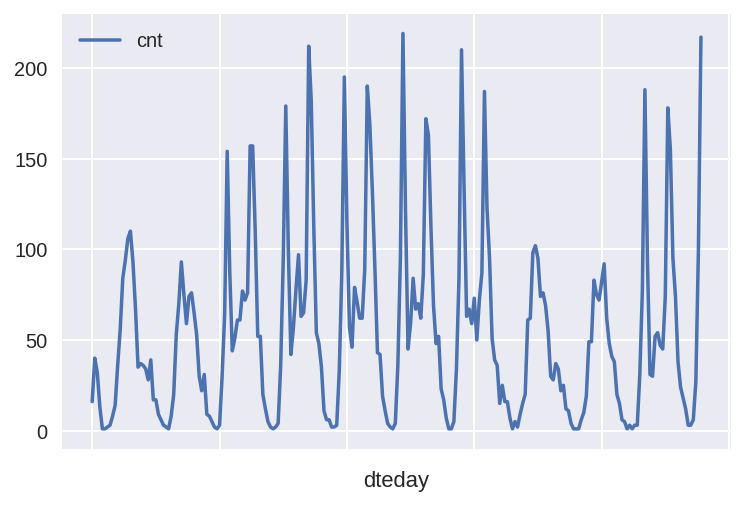

In [14]:
rides[:240].plot(x='dteday', y='cnt')

# Preprocessing

## Dummy variables
Here we have some categorical variables like season, weather, month. To include these in our model, we'll need to make binary dummy variables. This is simple to do with Pandas thanks to `get_dummies()`.

In [15]:
rides.season.unique()

array([1, 2, 3, 4])

we are converting some variables to dummy variable because they have integer values
so when we have integer values in our dataset but actually they are class variable like 
season have 4 intergers (1, 2, 3, 4) so we need to convert them into class variable. becuase our model assumes that 1<2<3<4 so it can hurt our model.

In [16]:
rides.instant.unique()

array([    1,     2,     3, ..., 17377, 17378, 17379])

In [17]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
data.season_1.describe()

count    17379.000000
mean         0.244088
std          0.429557
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: season_1, dtype: float64

## Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [0]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

## Splitting the data into training, testing, and validation sets

We'll save the last 21 days of the data to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

In [0]:
train_data = data[:-21*24]

# Save the last 21 days for testing
test_data = data[-21*24:]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']

features, targets = train_data.drop(target_fields, axis=1), train_data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [21]:
features.shape, targets.shape, test_features.shape, test_targets.shape

((16875, 56), (16875, 3), (504, 56), (504, 3))

We'll split the data into two sets, one for training and one for validating as the network is being trained. It's important to split the data randomly so all cases are represented in both sets.

In [0]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = .2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13500, 56), (3375, 56), (13500, 3), (3375, 3))

In [38]:
y_train[:3]

,cnt,casual,registered
15699,-0.256154,0.067413,-0.328936
9261,0.681066,-0.500481,0.979227
10982,1.805729,3.880411,0.899944


# Build Neural Network

## Time to build the network

Below you'll build your network. You'll implement the forward pass through the network. You'll also set the hyperparameters: the learning rate, the number of hidden units, and the number of training passes.

The network has two layers, a hidden layer and an output layer. The hidden layer will use the **sigmoid** function for activations. The output layer has only one node and is used for the regression, the output of the node is the same as the input of the node. That is, the activation function is $f(x)=x$. A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called *forward propagation*.

We use the weights to propagate signals forward from the input to the output layers in a neural network. We use the weights to also propagate error backwards from the output back into the network to update our weights. This is called *backpropagation*.

> **Hint:** You'll need the derivative of the output activation function ($f(x) = x$) for the backpropagation implementation. If you aren't familiar with calculus, this function is equivalent to the equation $y = x$. What is the slope of that equation? That is the derivative of $f(x)$.

Below, you have these tasks:
1. Implement the sigmoid function to use as the activation function. Set `self.activation_function` in `__init__` to your sigmoid function.
2. Implement the forward pass in the `train` method.
3. Implement the backpropagation algorithm in the `train` method, including calculating the output error.
4. Implement the forward pass in the `run` method.
  

**check which function takes more time**

In [34]:
a = np.arange(100000000)
%timeit np.dot(a, a.T)
%timeit a @ a.T

10 loops, best of 3: 145 ms per loop
10 loops, best of 3: 144 ms per loop


In [40]:
inputs = np.array(X_train, ndmin=2).T
inputs.shape

(56, 13500)

In [42]:
targets = np.array(y_train, ndmin = 2).T
targets.shape

(3, 13500)

In [0]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                                (self.hidden_nodes, self.input_nodes))
    
        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.output_nodes, self.hidden_nodes))
        
        self.learning_rate = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # TODO: Activation function is the sigmoid function
        self.activation_function = sigmoidFunction
    
    def fit(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin = 2).T
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        hidden_inputs = self.weights_input_to_hidden @ inputs
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # TODO: Output layer
        final_inputs = self.weights_hidden_to_output @ hidden_outputs
        final_outputs = final_inputs
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        # TODO: Output error
        output_errors = targets - final_outputs # Output layer error is the difference between desired target and actual output.
        
        # TODO: Backpropagated error
        hidden_errors = output_errors * self.weights_hidden_to_output * 1.0 # errors propagated to the hidden layer
        hidden_grad = hidden_errors.T * hidden_outputs * (1 - hidden_outputs) @ inputs.T # hidden layer gradients
        
        # TODO: Update the weights
        grad_out = hidden_outputs @ output_errors * 1.0
        self.weights_hidden_to_output += self.learning_rate * grad_out.T / inputs.shape[1] # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.learning_rate * hidden_grad / inputs.shape[1] # update input-to-hidden weights with gradient descent step
        
    def predict(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = self.weights_input_to_hidden @ inputs # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # TODO: Output layer
        final_inputs = self.weights_hidden_to_output @ hidden_outputs # signals into final output layer
        final_outputs = final_inputs # signals from final output layer
        
        return final_outputs

In [0]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [0]:
def sigmoidFunction(x):
    return 1 / (1 + np.exp(-x))

## Training the network

Here you'll set the hyperparameters for the network. You'll also be using a method know as Stochastic Gradient Descent (SGD) to train the network. The idea is that for each training pass, you grab a random sample of the data instead of using the whole data set. You use many more training passes than with normal gradient descent, but each pass is much faster. This ends up training the network faster. You'll learn more about SGD later.

### Choose the number of epochs
This is the number of times the dataset will pass through the network, each time updating the weights. As the number of epochs increases, the network becomes better and better at predicting the targets in the training set. However, it can become too specific to the training set and will fail to generalize to the validation set. This is called overfitting. You'll need to choose enough epochs to train the network well but not too many or you'll be overfitting.

### Choose the learning rate
This scales the size of weight updates. If this is too big, the weights tend to explode and the network fails to fit the data. A good choice to start at is 0.1. If the network has problems fitting the data, try reducing the learning rate. Note that the lower the learning rate, the smaller the steps are in the weight updates and the longer it takes for the neural network to converge.

### Choose the number of hidden nodes
The more hidden nodes you have, the more accurate predictions the model will make. Try a few different numbers and see how it affects the performance. You can look at the losses dictionary for a metric of the network performance. If the number of hidden units is too low, then the model won't have enough space to learn and if it is too high there are too many options for the direction that the learning can take. The trick here is to find the right balance in number of hidden units you choose.

In [36]:
import sys
### Set the hyperparameters here ###
epochs = 1000
learning_rate = 0.1
hidden_nodes = 10
output_nodes = 1

N_i = X_train.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(X_train.index, size = 128)
    for record, target in zip(X_train.loc[batch].values, 
                              y_train.loc[batch]['cnt']):
        network.fit(record, target)
    sys.stdout.write(f'\r epoch {e + 1}/{epochs}')
    sys.stdout.flush()
    print(end = ':- ')
    if e %(epochs/10) == 0:
      # Calculate losses for the training and test sets
      train_loss = MSE(network.predict(X_train), y_train['cnt'].values)
      val_loss = MSE(network.predict(X_test), y_test['cnt'].values)
      losses['train'].append(train_loss)
      losses['validation'].append(val_loss)
      # Print out the losses as the network is training
      print(f'Training loss: {train_loss}', end = ',  ')
      print(f'Validation loss: {val_loss}')
    elif e == epochs - 1:
      train_loss = MSE(network.predict(X_train), y_train['cnt'].values)
      val_loss = MSE(network.predict(X_test), y_test['cnt'].values)
      losses['train'].append(train_loss)
      losses['validation'].append(val_loss)
      # Print out the losses as the network is training
      print(f'Training loss: {train_loss}', end = ',  ')
      print(f'Validation loss: {val_loss}')

 epoch 1/1000:- Training loss: 0.8125314135413357,  Validation loss: 0.7953263104492004
 epoch 101/1000:- Training loss: 0.173599781867135,  Validation loss: 0.1845180254093662
 epoch 201/1000:- Training loss: 0.09651647567266203,  Validation loss: 0.1086445983245585
 epoch 301/1000:- Training loss: 0.08571009478116981,  Validation loss: 0.09356079799198186
 epoch 401/1000:- Training loss: 0.08334591785399947,  Validation loss: 0.09283013354169774
 epoch 501/1000:- Training loss: 0.0735758409588559,  Validation loss: 0.082157051690379
 epoch 601/1000:- Training loss: 0.078712004263322,  Validation loss: 0.08415435817046174
 epoch 701/1000:- Training loss: 0.1003936999370653,  Validation loss: 0.10481168761617574
 epoch 801/1000:- Training loss: 0.06560066474736433,  Validation loss: 0.07608468509087395
 epoch 901/1000:- Training loss: 0.06961716891664095,  Validation loss: 0.08082533824228731
 epoch 1000/1000:- Training loss: 0.07126156454366317,  Validation loss: 0.08164313152096501


In [0]:
import seaborn as sns

In [0]:
sns.set_context('poster')

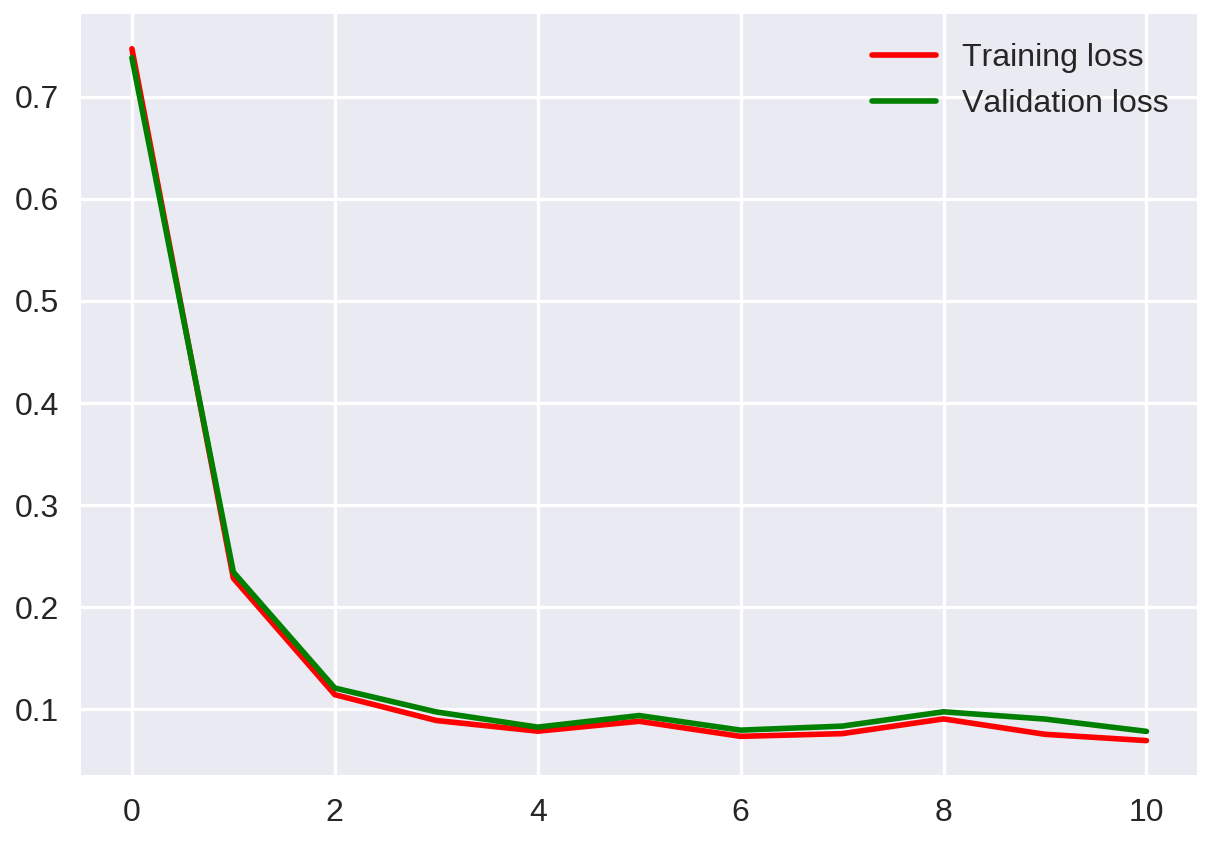

In [31]:
plt.figure(figsize = (10, 7))
plt.plot(losses['train'], label='Training loss', c = 'r')
plt.plot(losses['validation'], label='Validation loss', c = 'g')
plt.legend()

## Check out your predictions

Here, use the test data to check that network is accurately making predictions. If your predictions don't match the data, try adjusting the hyperparameters and check to make sure the forward passes in the network are correct.

In [44]:
predictions = network.predict(test_features)*std + mean
predictions.shape

(1, 504)

In [47]:
predictions

array([[ 1.32775209e+02,  9.78315293e+01, -7.55749542e-01,
         1.34602474e+01, -1.05963548e+01, -1.74483350e+01,
        -1.92408522e+01,  4.37563519e+00,  1.18665667e+02,
         4.79948896e+02,  6.41884849e+02,  3.70175617e+02,
         1.63734385e+02,  1.74533725e+02,  2.03387702e+02,
         2.16635855e+02,  1.93735392e+02,  2.19082816e+02,
         3.10074575e+02,  6.43793526e+02,  5.86388894e+02,
         4.49344141e+02,  3.19964235e+02,  2.25998452e+02,
         1.53751603e+02,  1.04739130e+02,  4.38255247e+01,
         1.71369843e+01,  9.26329397e+00,  6.88015763e+00,
         1.50501900e+00,  3.56559694e+01,  1.07744848e+02,
         3.49340777e+02,  5.61787567e+02,  2.82308544e+02,
         1.30419891e+02,  1.63896695e+02,  2.14048255e+02,
         2.12265045e+02,  1.86790307e+02,  2.06673536e+02,
         2.76802418e+02,  5.31018555e+02,  4.78118026e+02,
         3.21883792e+02,  2.82410280e+02,  1.62281874e+02,
         1.27687823e+02,  8.51805600e+01,  5.72959209e+0

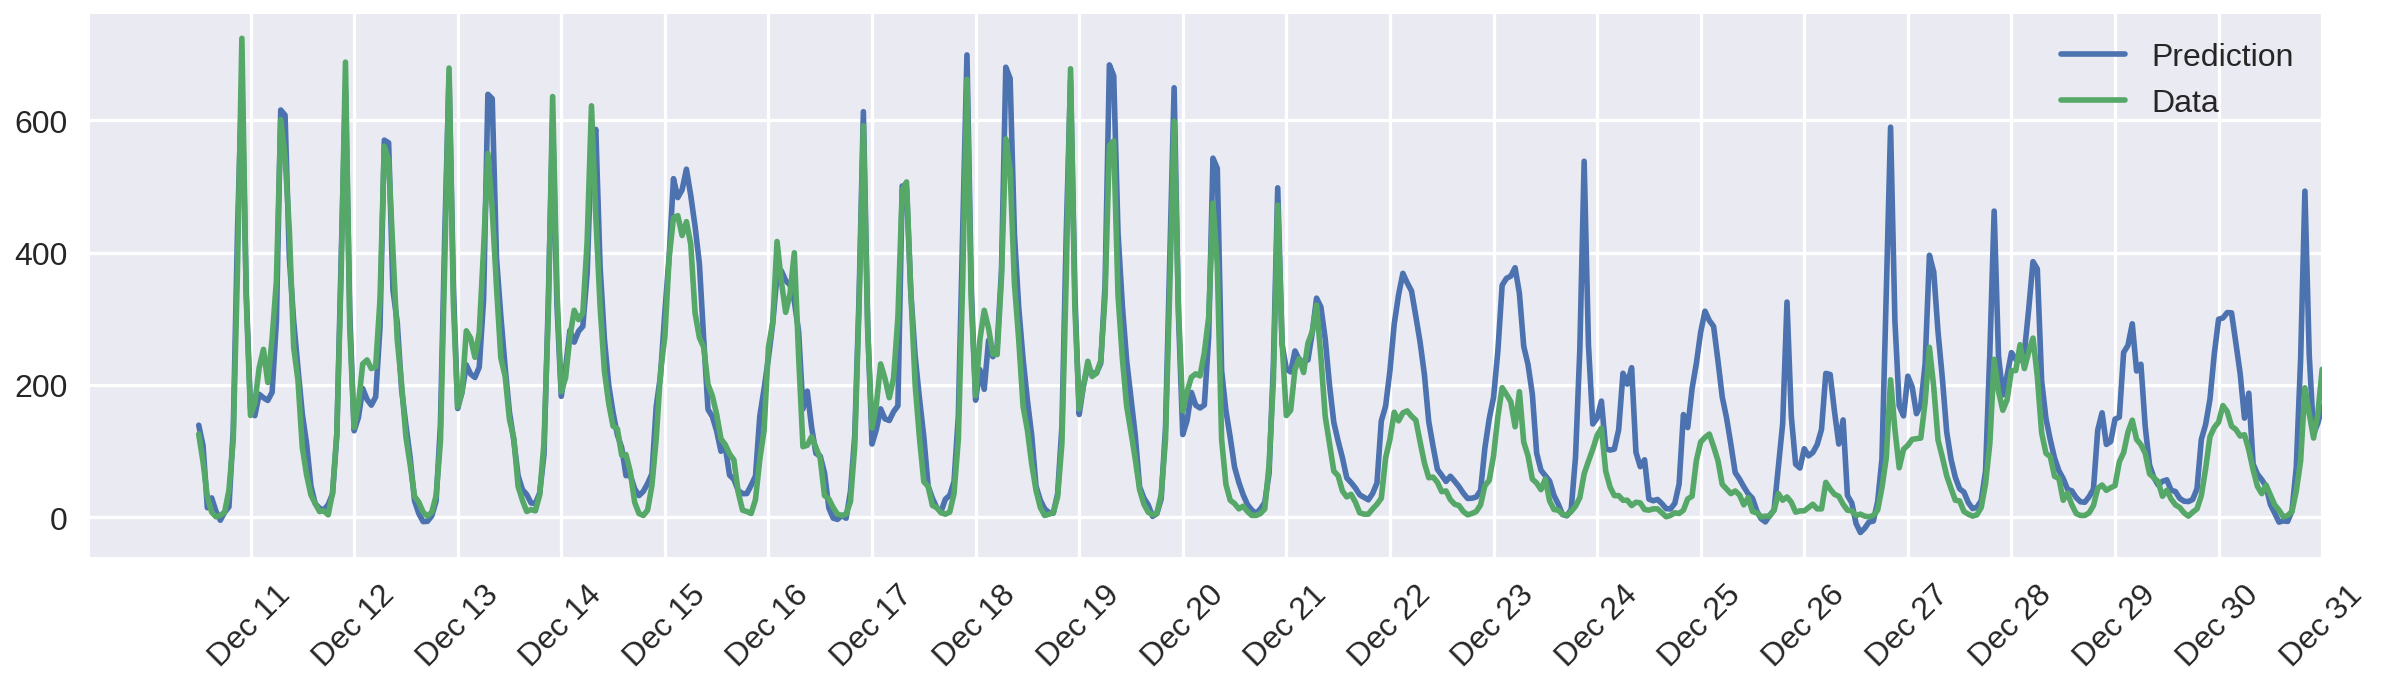

In [32]:
fig, ax = plt.subplots(figsize=(20, 5))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.loc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

## Thinking about your results
 
Answer these questions about your results. How well does the model predict the data? Where does it fail? Why does it fail where it does?

> **Note:** You can edit the text in this cell by double clicking on it. When you want to render the text, press control + enter

#### Answer
The predictions seem really good to me, for the most part, until it gets to the end of the month.  It might be overfitting just a little bit when there are severe fluctuations, for example when you get to the end of the month of December (during the holidays) it looks like the model is not responding well to the dip in bike rentals. I am looking forward to learning more how this can be solved.

After doing a bit of research, I found some helpful tips to how we might be able to improve the Neural Network.  The first option is to decrease the size of the network, but I found that this did not help in this case.  The next suggestion was to combine multiple networks together.  I think that this would've been a great solution, but I don't feel confident enough yet to try this.


## Unit tests

Run these unit tests to check the correctness of your network implementation. These tests must all be successful to pass the project.

In [33]:
import unittest

np.random.seed(42)
inputs = [0.5, -0.2, 0.1]
targets = [0.4]

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path == 'bike-sharing-dataset/hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    [ 0.22931895, -1.28754157]))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    [[-0.7128223, 0.22086344, -0.64139849],
                                     [-1.06444693, 1.06268915, -0.17280743]]))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        self.assertTrue(np.allclose(network.run(inputs), -0.97900982))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.011s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>